<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Task-Description" data-toc-modified-id="Task-Description-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Task Description</a></span></li></ul></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling</a></span><ul class="toc-item"><li><span><a href="#Defining-Sampling-Functions" data-toc-modified-id="Defining-Sampling-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Defining Sampling Functions</a></span><ul class="toc-item"><li><span><a href="#Testing-the-functions" data-toc-modified-id="Testing-the-functions-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Testing the functions</a></span></li></ul></li><li><span><a href="#Generating-Samples" data-toc-modified-id="Generating-Samples-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Generating Samples</a></span></li><li><span><a href="#Visualizing-the-Results" data-toc-modified-id="Visualizing-the-Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing the Results</a></span></li></ul></li></ul></div>

## Dependencies

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

## Task Description
Generate samples from a directed graphical model.

- Write Python code to generate and visualize samples from the below model. Generate samples and plots for 3 different players and 4 games per player from this generative model.
- Each player gets given an expected field goal rate from the uniform distribution. The expected field goal rate is always the same in all their games. In any particular game, the number of successful field goals is given by a binomial distribution.
- Fixed hyperparameters: α = 1, β = 1.
- Field goal success rate $p_i$ for player $i$:

    $$p_i \sim Beta(\alpha,\beta)$$

    The number of field goals made $k_{ij}$ by player $i$ in game $j$ where $n_{ij}$ field goals were attempted

    $$k_{ij} \sim Binomial(n_{ij}, p_i)$$

    [](https://www.notion.so/c1503ba37b6941e384bde0d8d51221df#0d6a9c57c3ec4fd0b36c4860f12ec632)

# Sampling

## Defining Sampling Functions
We'll start by defining the functions from which we sample our p and k parameters.

In [2]:
def sample_beta(alpha = 1, beta = 1):
    """Alpha and Beta are defined and we only sample
    once for a players the field goal rate p."""
    p = stats.beta.rvs(alpha, beta, size=1)
    return float(p)
    
def sample_binomial(n, p):
    """ N is the number of goals attempted and p the
    field goal rate of the player (we sample several
    k successes from a single rate p)."""
    k = stats.binom.rvs(n, p, size=1)
    return int(k)

### Testing the functions

In [3]:
p = sample_beta()
print("p: ", p)
k = sample_binomial(10, p)
print("k: ", k)

p:  0.3887403913977126
k:  3


## Generating Samples
We are generating 4 sample games each for 3 different players. Let's assume each game has 100 trials (n).

In [4]:
games = list(range(0,4))
results = {"Alex": {}, "Barbara": {}, "Christie": {}}
shots = 100

for i, player in enumerate(results.keys()):
    win_rate = sample_beta()
    results[player]["p"] = win_rate
    
    results[player]["k"] = []
    for j in games:
        successes = sample_binomial(shots, win_rate)
        results[player]["k"].append(successes)
        
print (results)

{'Alex': {'p': 0.8897258550632793, 'k': [93, 92, 83, 89]}, 'Barbara': {'p': 0.47553251773903377, 'k': [50, 47, 48, 54]}, 'Christie': {'p': 0.909089092628255, 'k': [89, 89, 92, 89]}}


## Visualizing the Results

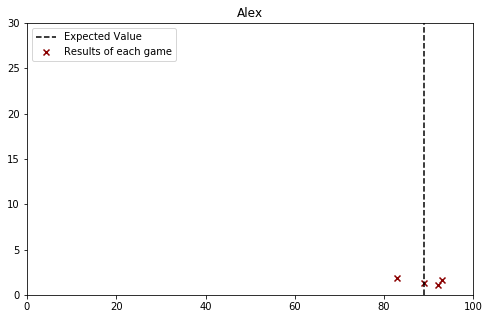

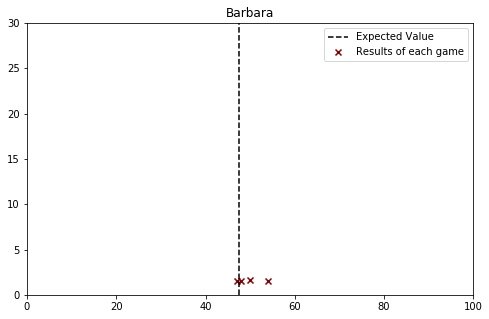

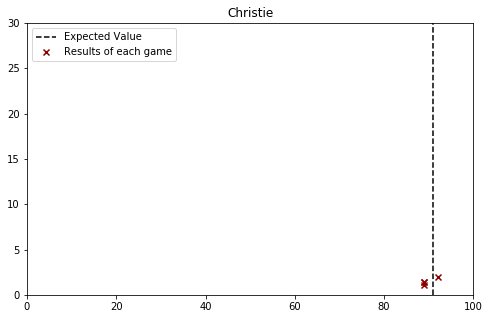

In [5]:
x = np.linspace(0,100, 100)

for player in results.keys():
    plt.figure(figsize=(8,5))
    y = np.random.uniform(1, 2, size = len(results[player]['k']))
    
    plt.scatter(results[player]['k'], y, color='darkred', marker='x',
                label='Results of each game')
    plt.axvline(results[player]['p']*shots, color='k', linestyle='--',
                label="Expected Value")
    plt.title(player)
    plt.legend()
    plt.xlim(0,100)
    plt.ylim(0,30)